## SVR Concept

<font size=4>Support Vectore Regression is a version of Support Vector Machine for regression.
we can use SVR for working with continuous Values instead of Classification which is SVM 

[More about SVR](https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff)

[SVR explained](http://www.saedsayad.com/support_vector_machine_reg.htm)

<img src="SVR_1.png">

### TERMS

<font size=4>
Two Dashed lines are called <b>Boundary Line</b>
    <br>Line in between is called <b>Hyperplane</b>
    <br>Data points which are closest to the Boundary Line are called <b>Support Vectors</b>
    <br>Distances between Boundary lines and Hyperplane are "+e" and "-e"(negative and positive epsilon)
</font>

### Concept

<font size=4>
    SVR is about deciding a boundary at ‘e’ distance from the original hyper plane such that data points closest to the hyper plane or the support vectors are within that boundary line
    <br>Decision boundary is Margin of tolerance and only data points which are within boundary are taken in consideration.
    <br>To make explanation simpler, that we are going to take only those data points which have least error rate. Thus giving us a better fitting model.

## SVR in python

<font size=4 >Let's import all the libraries first!</font>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVR #Our today's topic

<font size=4 >Let's get the Data!</font>

In [0]:
dataset = pd.read_csv('50_Startups.csv') #Loading the data into DataFrame
dataset.head() #Displaying the data to make sure DataFrame is alright

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
###  dataframe.iloc requires 1)ROW(s) and 2)Column(s)
x = dataset.iloc[:, 2:3].values #Put a colon to choose all rows. 
y = dataset.iloc[:, 4:].values #Profit column is at 4 index(start counting from 0 like a programmer!)


<font size=4>Let's create the model and Fit the data

In [0]:
svr_regressor_model = SVR().fit(x, y)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size=4>Let's visualize the values and model

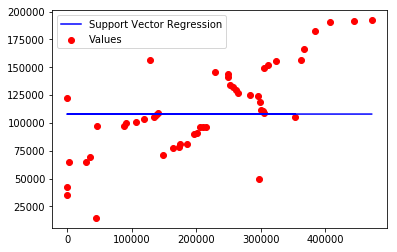

In [0]:
plt.scatter(x, y, c='r', label="Values")
plt.plot(x, svr_regressor_model.predict(x), c='b', label="Support Vector Regression")
plt.legend()
plt.show()

<font size=4> The model does not look so effective as we expected.<br>
    WHY?<br>
    Maybe because we forgot to do <b>feature scaling</b>. Let's try 

<font size=4>Feature Scaling is a method used to standartize data and it is also referred as "Normalization"

In [0]:
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler().fit(x)
scalery = StandardScaler().fit(y)
X = scalerx.transform(x)
Y = scalery.transform(y)



<font size=4>Fitting data to the new model

In [0]:
#Let's name this model a bit differently to differenciate with previous model
svr_regressor_rbf = SVR().fit(X, Y)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size=4>Visualizing

In [0]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

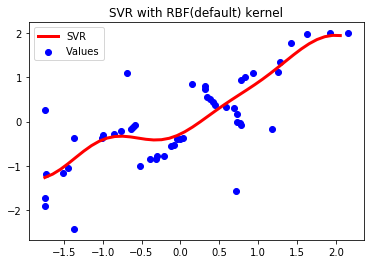

In [0]:
plt.scatter(X,Y, c='b', label="Values")
plt.plot(X_grid, svr_regressor_rbf.predict(X_grid), c='r', label="SVR",linewidth=3)
plt.title("SVR with RBF(default) kernel")
plt.legend()
plt.show()

<font size=4>This model looks much better than previous. Which means we need to scale the data before fitting it into the SVR 
    model

<font size=4>SVR model has many optional parameters, but the most important one is <b>Kernel</b><br>
    There are 3 kernels for SVR models: <b>Linear, Polynomial and RBF</b>(default) which we used above

<font size=5 color='red'>SVR model with <b>linear</b> kernel 

<font size=4>Fitting data to the SVR model with Linear kernel

In [0]:
#Let's name this model a bit differently to differenciate with previous model
svr_regressor_linear = SVR(kernel='linear').fit(X, Y)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size=4>Visualizing

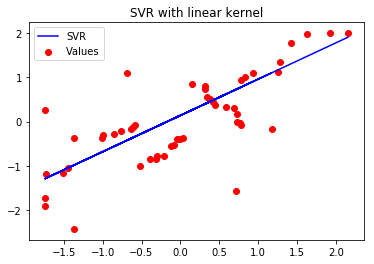

In [0]:
plt.scatter(X, Y, c='r', label="Values")
plt.plot(X, svr_regressor_linear.predict(X), c='b', label="SVR")
plt.title("SVR with linear kernel")
plt.legend()
plt.show()

<font size=4>This model with Linear kernel is worse than previous model with RBF kernel<br>
    To prove it, I will use Score function of SVR model
    <br>Formula of computing the <b>score</b> is following

$$ Score= 1- \frac { \sum\limits_{k = 1}^n {(y_{obs_k}-y_{pri_k})^2} } {\sum\limits_{k = 1}^n {(y_{obs_k}-y_{obs_ave})^2 }}$$

<font size=4>
    Let's compute scores of each model

In [0]:
svr_regressor_rbf.score(X,Y) #rbf kernel with scaling(rbf)

0.60499557620276678

In [0]:
svr_regressor_linear.score(X,Y) #linear kernel with scaling

0.53395362110617328

<font size=4>As we can see, the model with RBF kernel fits better than with Linear kernel

<font size=4> Let's try to create a model with Polynomial kernel</font><br>


<font size=5 color='red'>SVR model with <b>Polynomial</b> kernel 

<font size=4>Fitting data to the SVR model with Polynomial kernel

In [0]:
#Let's name this model a bit differently to differenciate with previous model
svr_regressor_model_poly = SVR(kernel='poly').fit(X,Y)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size=4>Visualizing

In [0]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

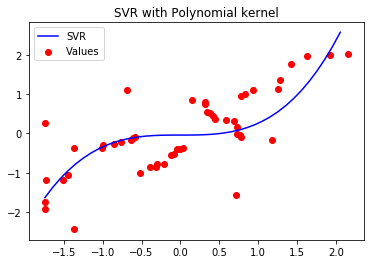

In [0]:
plt.scatter(X, Y, c='r', label="Values")
plt.plot(X_grid, svr_regressor_model_poly.predict(X_grid), c='b', label="SVR")
plt.title("SVR with Polynomial kernel")
plt.legend()
plt.show()

<font size=4>Let's get the score and compare 

In [0]:
svr_regressor_model_poly.score(X,Y) #Polynomial kernel with scaling

0.514185072094127

<font size=4>We have created 4 models and have 4 different scores for each model. Let's summarize:
    <br>1. With default kernel. Score = 0.60
    <br>2. With Linear kernel. Score = 0.53
    <br>3. With Polynomial kernel. Score = 0.51

<font size=4> Conclusion:
    <br>Best model for our data was the Model with <b>RBF</b>(default) Kernel and 
    <br>Obviously, for SVR models we need to <b>Scale</b>(normalize, standardize) data

## prediction with best Model
   Let's predict of value with best model(rbf svr).we have selected first Marketing Spend as x and wants to predict the benefit that is y, for checking the prediction of rbf svr. x=471784(marketing spend) and y=192261.83(benefit). after prediction the value of y_new by using rbf svr is 0.2385 that is because of scaling data so we should use inverse of scaling that is (inverse_transform).so you can see the predicted value is y_new_inverse is 121531.592 but if you see the real data for this x=471784.1 is y=192261.83 but as we calculated the rbf score=0.6 so this accuracy of prediction is acceptable.Now you can find the benefit of any marketing spend with this accuracy!you can try another x values and find y_new_inverse

In [0]:
y_new=svr_regressor_rbf.predict(471784.10)
print(y_new)
y_new_inverse = scalery.inverse_transform(y_new)
y_new_inverse

[ 0.23856378]


array([ 121531.59233046])

## Questions

<font size=4>1. Take R&D Spend as Independent variable(X)

In [0]:
<font size=4> 2. Create a model with Linear kernel and fit the data(X,Y)

<font size=4>3. Visualize the scatters and model

<font size=4>4. Compute the Score of the model

<font size=4>5. Create a model with Polynomial kernel and fit the data

<font size=4>6. Visualize the scatters and model with Polynomial kernel

<font size=4>7. Compute the Score of the model with Polynomial kernel

<font size=4>8. Create a model with RBF kernel and fit the data

<font size=4>9. Visualize the scatters and model with RBF kernel

<font size=4>10. Compute the Score of the model with RBF kernel

<font size=4>11. Compare(conclude) all 3 scores of models and decide which model is the best one

Tip: Don't forget to scale your data before fitting into the model